In [1]:
from ray.tune import Analysis
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import plotly.express as px

In [85]:
user_home = os.path.expanduser("~")
analysis = Analysis(os.path.join(user_home, "ray_results", "ntk_error_onelayer"))

In [86]:
configs = analysis.get_all_configs()
dfs = analysis.trial_dataframes
trials = list(configs.keys())

In [87]:
for trial in trials:
    df = dfs[trial]
    for key, val in configs[trial].items():
        df[f"config/{key}"] = val

In [88]:
df_all = pd.concat([y for y in analysis.trial_dataframes.values()])

In [89]:
del df_all['config/config_gin']

In [91]:
del df_all['experiment_id']

In [94]:
del df_all['hostname']

In [99]:
del df_all['experiment_tag']

In [100]:
df_all.to_csv('../results/ntk_error_onelayer.csv', index=False, float_format='%.3f')

In [25]:
df_all

,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,experiment_id,date,timestamp,time_total_s,pid,...,_metric/n_init,_metric/n_inp,_metric/inp_chunk,perf/cpu_util_percent,perf/ram_util_percent,perf/gpu_util_percent0,perf/vram_util_percent0,config/_gin__nunits__choice,config/config_gin,config/log_sys_usage
0,8.367376,False,NaN,NaN,1,2b10d59d537649128ef0576406b5a0d7,2020-11-15_22-08-06,1605474486,8.367376,5703,...,0,0,0,52.475,48.1125,0.0675,0.389374,500,import fault_tolerance.experiment\nimport faul...,True
1,0.079969,False,NaN,NaN,2,2b10d59d537649128ef0576406b5a0d7,2020-11-15_22-08-07,1605474487,8.447345,5703,...,0,1,0,NaN,NaN,NaN,NaN,500,import fault_tolerance.experiment\nimport faul...,True
2,0.029480,False,NaN,NaN,3,2b10d59d537649128ef0576406b5a0d7,2020-11-15_22-08-07,1605474487,8.476825,5703,...,0,2,0,NaN,NaN,NaN,NaN,500,import fault_tolerance.experiment\nimport faul...,True
3,0.021175,False,NaN,NaN,4,2b10d59d537649128ef0576406b5a0d7,2020-11-15_22-08-07,1605474487,8.498001,5703,...,0,3,0,NaN,NaN,NaN,NaN,500,import fault_tolerance.experiment\nimport faul...,True
4,0.035147,False,NaN,NaN,5,2b10d59d537649128ef0576406b5a0d7,2020-11-15_22-08-07,1605474487,8.533148,5703,...,0,4,0,NaN,NaN,NaN,NaN,500,import fault_tolerance.experiment\nimport faul...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.042627,False,NaN,NaN,996,d6bbcd6e143241f194955cfdaa8d2d83,2020-11-16_08-18-43,1605511123,453.932879,23955,...,99,5,0,NaN,NaN,NaN,NaN,200,import fault_tolerance.experiment\nimport faul...,True
996,0.025539,False,NaN,NaN,997,d6bbcd6e143241f194955cfdaa8d2d83,2020-11-16_08-18-43,1605511123,453.958418,23955,...,99,6,0,NaN,NaN,NaN,NaN,200,import fault_tolerance.experiment\nimport faul...,True
997,0.062604,False,NaN,NaN,998,d6bbcd6e143241f194955cfdaa8d2d83,2020-11-16_08-18-43,1605511123,454.021022,23955,...,99,7,0,58.300,72.7000,0.1000,0.486328,200,import fault_tolerance.experiment\nimport faul...,True
998,0.210842,False,NaN,NaN,999,d6bbcd6e143241f194955cfdaa8d2d83,2020-11-16_08-18-43,1605511123,454.231864,23955,...,99,8,0,NaN,NaN,NaN,NaN,200,import fault_tolerance.experiment\nimport faul...,True


In [7]:
df_all.columns

Index(['time_this_iter_s', 'done', 'timesteps_total', 'episodes_total',
       'training_iteration', 'experiment_id', 'date', 'timestamp',
       'time_total_s', 'pid', 'hostname', 'node_ip', 'time_since_restore',
       'timesteps_since_restore', 'iterations_since_restore', 'trial_id',
       'experiment_tag', '_metric/input', '_metric/out', '_metric/delta_mean',
       '_metric/delta_std', '_metric/n_init', '_metric/n_inp',
       '_metric/inp_chunk', 'perf/cpu_util_percent', 'perf/ram_util_percent',
       'perf/gpu_util_percent0', 'perf/vram_util_percent0',
       'config/_gin__nunits__choice', 'config/config_gin',
       'config/log_sys_usage'],
      dtype='object')

In [8]:
config_columns = [c for c in df_all.columns if c.startswith("config/_gin")]
metric_columns = [c for c in df_all.columns if c.startswith("_metric")]

In [11]:
for config, df in df_all.groupby(config_columns):
    print(config, config_columns)
    if not isinstance(config, list):
        config = [config]
    config = dict(zip(config_columns, config))
    print(config)

1 ['config/_gin__nunits__choice']
{'config/_gin__nunits__choice': 1}
5 ['config/_gin__nunits__choice']
{'config/_gin__nunits__choice': 5}
10 ['config/_gin__nunits__choice']
{'config/_gin__nunits__choice': 10}
15 ['config/_gin__nunits__choice']
{'config/_gin__nunits__choice': 15}
30 ['config/_gin__nunits__choice']
{'config/_gin__nunits__choice': 30}
50 ['config/_gin__nunits__choice']
{'config/_gin__nunits__choice': 50}
100 ['config/_gin__nunits__choice']
{'config/_gin__nunits__choice': 100}
200 ['config/_gin__nunits__choice']
{'config/_gin__nunits__choice': 200}
500 ['config/_gin__nunits__choice']
{'config/_gin__nunits__choice': 500}
1000 ['config/_gin__nunits__choice']
{'config/_gin__nunits__choice': 1000}
2000 ['config/_gin__nunits__choice']
{'config/_gin__nunits__choice': 2000}
5000 ['config/_gin__nunits__choice']
{'config/_gin__nunits__choice': 5000}
10000 ['config/_gin__nunits__choice']
{'config/_gin__nunits__choice': 10000}


In [12]:
config_columns + metric_columns

['config/_gin__nunits__choice',
 '_metric/input',
 '_metric/out',
 '_metric/delta_mean',
 '_metric/delta_std',
 '_metric/n_init',
 '_metric/n_inp',
 '_metric/inp_chunk']

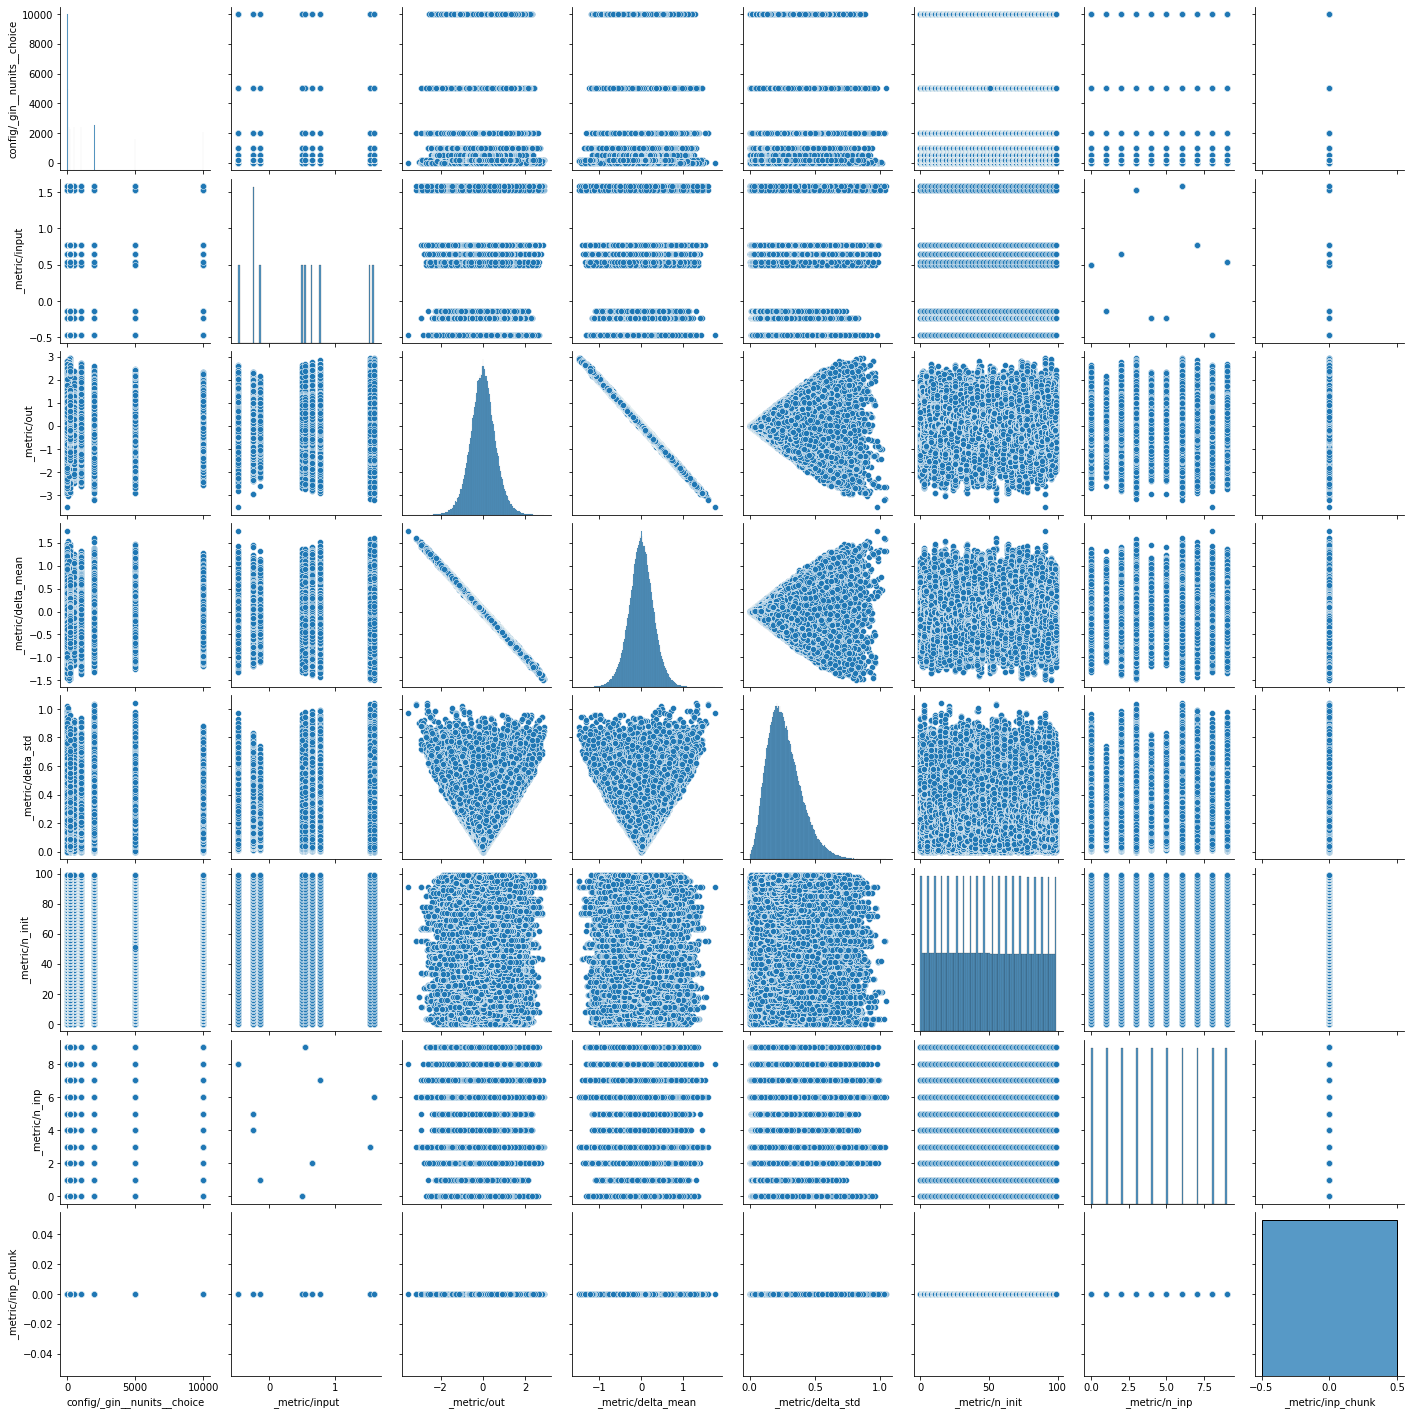

In [13]:
sns.pairplot(df_all[config_columns + metric_columns])

In [ ]:
sns.pairplot(df_all[config_columns + metric_columns], hue='_metric/delta_std', height=2.5);


In [17]:
analysis.dataframe().columns

Index(['time_this_iter_s', 'done', 'timesteps_total', 'episodes_total',
       'training_iteration', 'experiment_id', 'date', 'timestamp',
       'time_total_s', 'pid', 'hostname', 'node_ip', 'time_since_restore',
       'timesteps_since_restore', 'iterations_since_restore', 'trial_id',
       'experiment_tag', '_metric/input', '_metric/out', '_metric/delta_mean',
       '_metric/delta_std', '_metric/n_init', '_metric/n_inp',
       '_metric/inp_chunk', 'perf/cpu_util_percent', 'perf/ram_util_percent',
       'perf/gpu_util_percent0', 'perf/vram_util_percent0',
       'config/_gin__nunits__choice', 'config/config_gin',
       'config/log_sys_usage', 'logdir'],
      dtype='object')

In [18]:
len(df_all)

508242

In [19]:
df_all

,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,experiment_id,date,timestamp,time_total_s,pid,...,_metric/n_init,_metric/n_inp,_metric/inp_chunk,perf/cpu_util_percent,perf/ram_util_percent,perf/gpu_util_percent0,perf/vram_util_percent0,config/_gin__nunits__choice,config/config_gin,config/log_sys_usage
0,8.367376,False,NaN,NaN,1,2b10d59d537649128ef0576406b5a0d7,2020-11-15_22-08-06,1605474486,8.367376,5703,...,0,0,0,52.475,48.1125,0.0675,0.389374,500,import fault_tolerance.experiment\nimport faul...,True
1,0.079969,False,NaN,NaN,2,2b10d59d537649128ef0576406b5a0d7,2020-11-15_22-08-07,1605474487,8.447345,5703,...,0,1,0,NaN,NaN,NaN,NaN,500,import fault_tolerance.experiment\nimport faul...,True
2,0.029480,False,NaN,NaN,3,2b10d59d537649128ef0576406b5a0d7,2020-11-15_22-08-07,1605474487,8.476825,5703,...,0,2,0,NaN,NaN,NaN,NaN,500,import fault_tolerance.experiment\nimport faul...,True
3,0.021175,False,NaN,NaN,4,2b10d59d537649128ef0576406b5a0d7,2020-11-15_22-08-07,1605474487,8.498001,5703,...,0,3,0,NaN,NaN,NaN,NaN,500,import fault_tolerance.experiment\nimport faul...,True
4,0.035147,False,NaN,NaN,5,2b10d59d537649128ef0576406b5a0d7,2020-11-15_22-08-07,1605474487,8.533148,5703,...,0,4,0,NaN,NaN,NaN,NaN,500,import fault_tolerance.experiment\nimport faul...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.042627,False,NaN,NaN,996,d6bbcd6e143241f194955cfdaa8d2d83,2020-11-16_08-18-43,1605511123,453.932879,23955,...,99,5,0,NaN,NaN,NaN,NaN,200,import fault_tolerance.experiment\nimport faul...,True
996,0.025539,False,NaN,NaN,997,d6bbcd6e143241f194955cfdaa8d2d83,2020-11-16_08-18-43,1605511123,453.958418,23955,...,99,6,0,NaN,NaN,NaN,NaN,200,import fault_tolerance.experiment\nimport faul...,True
997,0.062604,False,NaN,NaN,998,d6bbcd6e143241f194955cfdaa8d2d83,2020-11-16_08-18-43,1605511123,454.021022,23955,...,99,7,0,58.300,72.7000,0.1000,0.486328,200,import fault_tolerance.experiment\nimport faul...,True
998,0.210842,False,NaN,NaN,999,d6bbcd6e143241f194955cfdaa8d2d83,2020-11-16_08-18-43,1605511123,454.231864,23955,...,99,8,0,NaN,NaN,NaN,NaN,200,import fault_tolerance.experiment\nimport faul...,True


<AxesSubplot:xlabel='config/_gin__nunits__choice', ylabel='_metric/delta_std'>

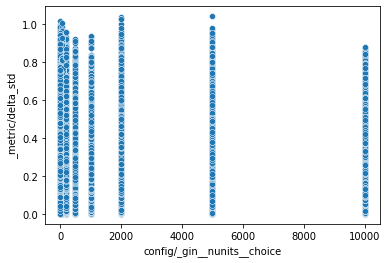

In [20]:
sns.scatterplot(x='config/_gin__nunits__choice', y='_metric/delta_std', data=df_all)

In [35]:
def meanabs(x):
    return np.mean(np.abs(x))
def maxabs(x):
    return np.max(np.abs(x))
def medianabs(x):
    return np.median(np.abs(x))

In [44]:
df_g = df_all.groupby('config/_gin__nunits__choice').agg(
    {'_metric/delta_std': [maxabs, meanabs, medianabs],
     '_metric/delta_mean': [maxabs, meanabs, medianabs]})
df_g.columns = ['/'.join(col).strip() for col in df_g.columns.values]

In [46]:
df_g

,_metric/delta_std/maxabs,_metric/delta_std/meanabs,_metric/delta_std/medianabs,_metric/delta_mean/maxabs,_metric/delta_mean/meanabs,_metric/delta_mean/medianabs
config/_gin__nunits__choice,,,,,,
1,0.986300,0.265262,0.248751,1.401361,0.228732,0.185599
5,0.944649,0.265256,0.248163,1.450428,0.233393,0.188528
10,1.017640,0.265919,0.249129,1.758897,0.231552,0.189119
15,0.902859,0.267497,0.251093,1.467531,0.231797,0.185864
30,0.887142,0.267354,0.250610,1.406115,0.230311,0.187103
50,1.007441,0.266050,0.248762,1.534255,0.230619,0.187814
100,0.922567,0.266987,0.249956,1.481484,0.230162,0.185541
200,0.958348,0.266644,0.248976,1.476391,0.229983,0.185466
500,0.922059,0.265880,0.248866,1.257142,0.230143,0.185599


In [53]:
df_g.columns

Index(['_metric/delta_std/maxabs', '_metric/delta_std/meanabs',
       '_metric/delta_std/medianabs', '_metric/delta_mean/maxabs',
       '_metric/delta_mean/meanabs', '_metric/delta_mean/medianabs'],
      dtype='object')

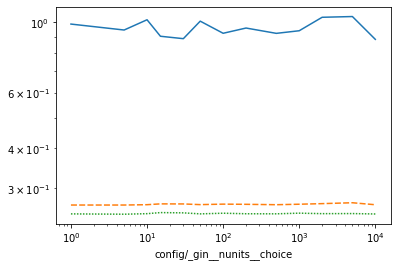

In [65]:
cols = [c for c in df_g.columns if c.startswith('_metric/delta_std')]
sns.lineplot(data=df_g[cols])
plt.xscale('log')
plt.yscale('log')
plt.show()

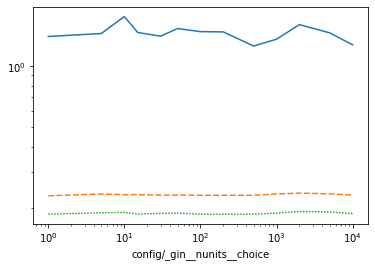

In [76]:
cols = [c for c in df_g.columns if c.startswith('_metric/delta_mean')]
sns.lineplot(data=df_g[cols], legend="full")
plt.xscale('log')
plt.yscale('log')
plt.show()

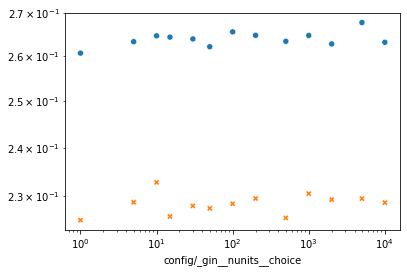

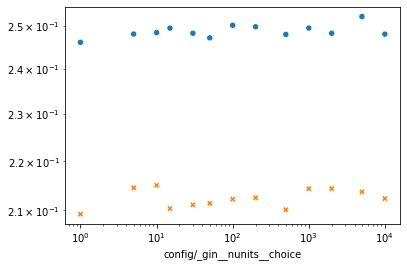

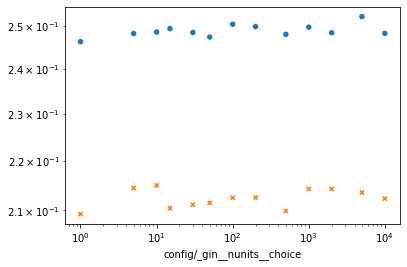

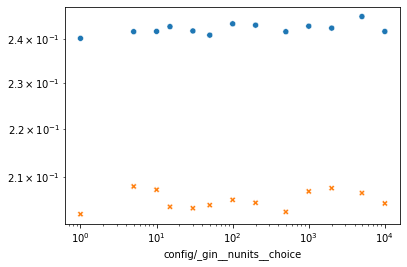

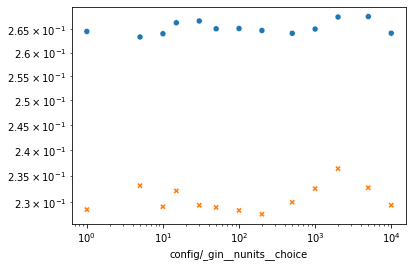

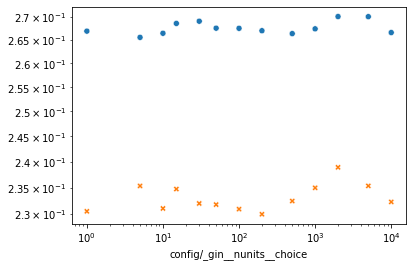

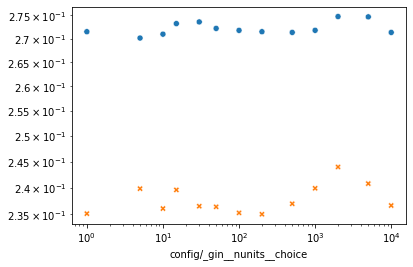

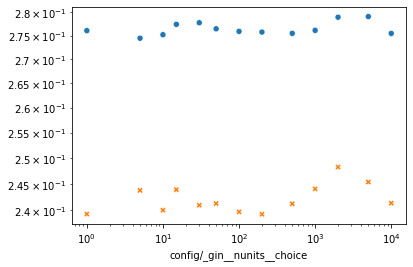

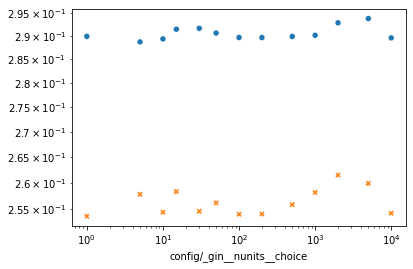

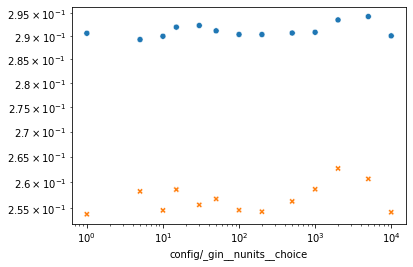

In [79]:
for inp, df_inp in df_all.groupby('_metric/input'):
#     print(df_inp.shape)
#     print(df_inp)
    df_inp_g = df_inp.groupby('config/_gin__nunits__choice').agg({'_metric/delta_std': np.mean,
                                                                  '_metric/delta_mean': meanabs})
    plt.figure()
    sns.scatterplot(data=df_inp_g, legend="full")
    plt.xscale('log')
    plt.yscale('log')
    plt.show()
#     break

## The error does not go down with the number of hidden units at all.